# asteroseismology@unibo  - computer-based exercises
## numerically computed oscillation modes
2 May 2024


### Asymptotic patterns of high-order pressure and gravity modes

Consider a model two models of your choice, one on the main sequence and one the red-giant branch and:

- compute a first estimate of the expected first-order asymptotic patterns for high-order p modes and high-order g modes
- based on a propagation diagram, discuss the expected properties of modes in different frequency domains.

Then, numerically compute radial and non-radial ($l=1,2$) pulsation modes in a frequency domain from $\frac{1}{2}\nu_{\rm max}$ to $\frac{3}{2}\nu_{\rm max}$

- plot and discuss frequency or period patterns of the numerically computed modes. How do they compare with the predicted asymptotic patterns?
- do you see any significant deviations from the expected patterns and, if you do, what is the likely origin of these departures from the expected pattern? 
- to support your description and interpretation, save and plot the radial and horizontal displacement eigenfunctions for few representative pulsation modes

### Sharp-structure variations (see lectures "Variational principle - structural glitches")

- Does the the large frequency separation $\Delta\nu=\nu_{n+1,l}-\nu_{n,l}$  depend on the frequency of the modes? (you can restrict yourself to the simpler case of radial modes, or to a main-sequence model)
- How about the period spacing?



In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

### Read pulsation modes of a main-sequence star (just an example!)

In [2]:
# add this line to generate interactive plots in the notebook
%matplotlib widget
dir_gyre='/Users/miglioa/astrosoft/MesaModels/gyre_work/'
file_l0=dir_gyre+'summary_MS_l0.txt'
file_l1=dir_gyre+'summary_MS_l1.txt'
file_l2=dir_gyre+'summary_MS_l2.txt'


s_0 = np.genfromtxt(file_l0, skip_header=5, names=True, dtype=None)
print(s_0.dtype.names)
s_1 = np.genfromtxt(file_l1, skip_header=5, names=True, dtype=None)
print(s_1.dtype.names)
s_2 = np.genfromtxt(file_l2, skip_header=5, names=True, dtype=None)
print(s_2.dtype.names)
nu_max=3100*(s_0['M_star'][0]/1.989200000000000E+033)*(3.8418E33/s_0['L_star'][0])**(0.125)*(6.9598E10/s_0['R_star'][0])**(1.75) #in microHz
nu_cutoff=5300*(s_0['M_star'][0]/1.989200000000000E+033)*(3.8418E33/s_0['L_star'][0])**(0.125)*(6.9598E10/s_0['R_star'][0])**(1.75) #in microHz
delta_nu=135.03587824856325*np.sqrt((s_0['M_star'][0]/1.989200000000000E+033)*(6.9598E10/s_0['R_star'][0])**(3)) #in microHz
print(delta_nu)
x_0=np.fmod(s_0['Refreq'],delta_nu)
x_1=np.fmod(s_1['Refreq'],delta_nu)
x_2=np.fmod(s_2['Refreq'],delta_nu)


('l', 'n_pg', 'Refreq', 'Imfreq', 'E_norm', 'beta', 'M_star', 'R_star', 'L_star', 'Delta_p', 'Delta_g')
('l', 'n_pg', 'Refreq', 'Imfreq', 'E_norm', 'beta', 'M_star', 'R_star', 'L_star', 'Delta_p', 'Delta_g')
('l', 'n_pg', 'Refreq', 'Imfreq', 'E_norm', 'beta', 'M_star', 'R_star', 'L_star', 'Delta_p', 'Delta_g')
138.89966118173757


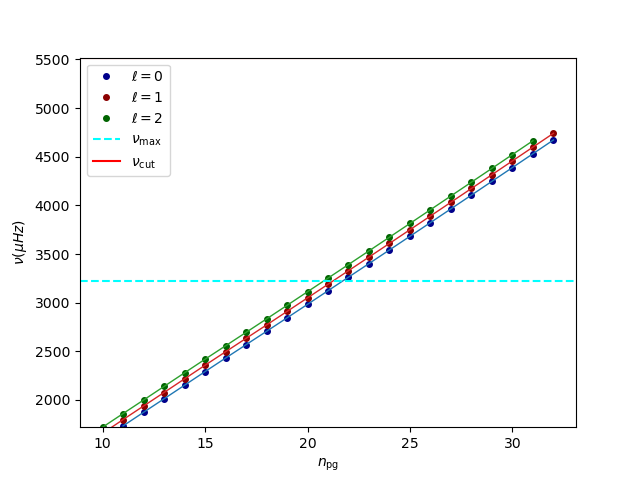

In [3]:
plt.figure()
plt.plot(s_0['n_pg'], s_0['Refreq'], label='$\\ell=0$',marker='o',linestyle='none', ms=4, color='darkblue')
plt.plot(s_1['n_pg'], s_1['Refreq'], label='$\\ell=1$',marker='o',linestyle='none', ms=4,color='darkred')
plt.plot(s_2['n_pg'], s_2['Refreq'], label='$\\ell=2$',marker='o',linestyle='none', ms=4,color='darkgreen')
plt.plot(s_0['n_pg'], s_0['Refreq'], label='_nolegend_', lw=1,color='tab:blue')
plt.plot(s_1['n_pg'], s_1['Refreq'], label='_nolegend_', lw=1,color='tab:red')
plt.plot(s_2['n_pg'], s_2['Refreq'], label='_nolegend_', lw=1,color='tab:green')
plt.axhline(nu_max, linestyle='--', color='cyan',label=r'$\nu_{\rm max}$')
plt.axhline(nu_cutoff, color='red',label=r'$\nu_{\rm cut}$')
plt.ylim(np.min(s_2['Refreq']),nu_cutoff+2)
plt.legend()
plt.xlabel('$n_{\\rm pg}$')
plt.ylabel('$\\nu (\\mu Hz$)')
plt.savefig("freq.pdf", format='pdf', bbox_inches='tight')



Text(0.5, 0, '$\\nu (\\mu Hz$)')

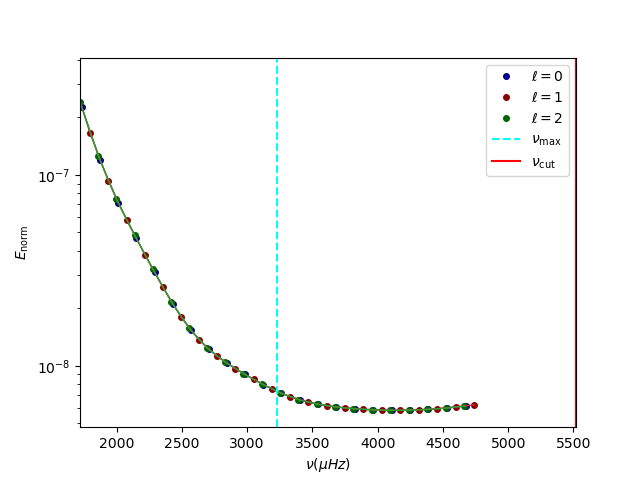

In [4]:
plt.close()
plt.figure()
plt.plot(s_0['Refreq'],s_0['E_norm'], label='$\\ell=0$',marker='o',linestyle='none', ms=4,color='darkblue')
plt.plot(s_1['Refreq'], s_1['E_norm'], label='$\\ell=1$',marker='o',linestyle='none', ms=4,color='darkred')
plt.plot(s_2['Refreq'], s_2['E_norm'], label='$\\ell=2$',marker='o',linestyle='none', ms=4,color='darkgreen')
plt.plot(s_0['Refreq'],s_0['E_norm'], label='_nolegend_', lw=1,color='tab:blue')
plt.plot(s_1['Refreq'], s_1['E_norm'], label='_nolegend_', lw=1,color='tab:red')
plt.plot(s_2['Refreq'], s_2['E_norm'], label='_nolegend_', lw=1,color='tab:green')
plt.axvline(nu_max, linestyle='--', color='cyan',label=r'$\nu_{\rm max}$')
plt.axvline(nu_cutoff, color='red',label=r'$\nu_{\rm cut}$')
plt.xlim(np.min([s_2['Refreq']]),nu_cutoff+2)
plt.legend()
plt.yscale('log')
plt.ylabel('$E_{\\rm norm}$')
plt.xlabel('$\\nu (\\mu Hz$)')